## Projet 6 : Analysez les ventes d'une librairie avec R ou Python

### Contexte: 
> Lapage est une librairie physique à l'origine mais qui a étendu ses activités en ligne en raison du succès de certains de ses produits et de l'enthousiasme de ses clients. Après deux ans d'exploitation de la boutique en ligne, **Lapage souhaite analyser ses forces et faiblesses, ainsi que le comportement de ses clients, pour déterminer sa position actuelle**. En tant que Consultant Data Analyst intégré au service Marketing, je suis chargé d'aider à analyser les données et de les présenter de manière claire et concise.

### Mission: 

>Réaliser une **analyse des différents indicateurs de vente** pour Antoine:
> 1. Les différents indicateurs et graphiques autour du chiffre d'affaires.
> 2. L’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale
> 3. Faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie, etc.
> 4. Quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz. 
> 5. Les informations supplémentaires et tous graphiques qui apporteraient de l’information pertinente.

>Réaliser une **analyse des correlations plus ciblée sur les clients** pour Julie :
> 1. Le lien entre le genre d’un client et les catégories des livres achetés ;
> 2. Le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.

## Notebook 1 : Importation et Nettoyage des Données

> Dans ce notebook, nous allons importer les données de ventes de la librairie et nettoyer les données pour nous assurer qu'elles sont prêtes à être analysées.

## Sommaire :


### Partie 1: Importation, nettoyage et préparation des données (Notebook 1)

### [1) Importation des données](#A1)
### [2) Nettoyage et préparation des données](#A2)

- [1.Table Produit](#A2.1)
- [2.Table Client](#A2.2)
- [3.Table Transaction](#A2.3)
 
### Partie 2: Analyses des données pour Antoine (Notebook 2)

#### [1. Analyse des indicateurs et graphiques autour du chiffre d'affaires](#B1)
- [1.1. Calcul des indicateurs de Chriffre d'Affaires](#B1.1)
- [1.2. Evolution du Chiffre d'Affaires par catégorie](#B1.2)
- [1.3. Evolution du Chiffre d'Affaires par série temporelle](#B1.3)

#### [2. Décomposition en moyenne mobile pour évaluer la tendance globale](#B2)

#### [3. Tops et flops des références avec la répartition par catégorie](#B3)

#### [4. Analyse des profils clients et répartition du chiffre d'affaires entre eux via une courbe de Lorenz](#B4)
- [4.1. Analyse des profils clients](#B4.1)
- [4.2. Répartition du Chiffre d'affaires par tranche d'âge et par sexe via la courbe de Lorenz](#B4.2)

#### [5. Analyses supplémentaires](#B5)
- [5.1. Répartition du Chiffre d'affaires par catégorie de produits](#B5.1)
- [5.2. Pourcentage de Chiffre d'affaires que représente le TOP 10 des produits](#B5.2)
- [5.3. Top 10 des clients](#B5.3)

### Partie 3: Analyses des données pour Julie (Notebook 3)

#### [1. Le lien entre le genre d’un client et les catégories des livres achetés](#C1)

#### [2. Le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés](#C2)
- [2.1. Le lien entre l’âge des clients et le montant total des achats](#C2.1)
- [2.2. Le lien entre l’âge des clients et la fréquence d’achats](#C2.2)
- [2.3. Le lien entre l'âge des clients et la taille du panier moyen](#C2.3)
- [2.4. Le lien entre l’âge des clients et les catégories des livres achetés](#C2.4)


## Partie 1: Importation, nettoyage et préparation des données

### <a id="A1">1) Importation des données</a>


In [1]:
# Import des librairies et fonctions nécessaires aux analyses

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as spi
import warnings
warnings.simplefilter("ignore")
from datetime import datetime
from scipy.integrate import trapz
import scipy.stats as stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

In [2]:
# chargement des données des fichiers csv

produit     = pd.read_csv('products.csv')
client      = pd.read_csv('customers.csv')
transaction = pd.read_csv('transactions.csv')

In [3]:
# Formatage du notebook 

# Création d'une classe nommée 'color' pour mettre en forme nos résultats.
class color:
   BLUE = '\033[94m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### <a id="A2">2) Nettoyage et préparation des données</a>

### <a id="A2.1">1.Table Produit</a>

In [4]:
# Affichage de la table Produit

produit = pd.read_csv('products.csv')
produit.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
# Vérification des dimensions du dataframe

produit.shape

(3287, 3)

In [6]:
# Renommage des variables

produit.rename( columns ={'id_prod': 'ref_produit', 'price': 'prix'}, inplace = True)
produit.head()

,ref_produit,prix,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [7]:
# Vérificaton des valeurs manquantes

produit.isnull().sum()

ref_produit    0
prix           0
categ          0
dtype: int64

In [8]:
# Vérification des doublons
# Test de la validité de la variable 'ref_produit'  comme clé primaire

doublons_produit = produit.duplicated(subset = 'ref_produit', keep = False).sum()

if doublons_produit == 0:
    print('La variable', color.BOLD+ " 'ref_produit' est une clé primaire valide." +color.END)
else:
    print('La variable', color.BOLD+ " 'ref_produit' n'est pas une clé primaire valide." +color.END)

La variable  'ref_produit' est une clé primaire valide.


In [9]:
# Vérification des erreurs de type

produit.dtypes

ref_produit     object
prix           float64
categ            int64
dtype: object

In [10]:
# Vérification des valeurs aberrantes et atypiques sur le prix

produit['prix'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: prix, dtype: float64

>La variable **'prix'** contient une **valeur négative**. Ce qui n'est pas possible en réalité. Pour éviter des incohérences dans les résultats, **cette ligne sera supprimée.**

In [11]:
# Affichage et suppression des valeurs négatives

prix_neg = produit.loc[produit['prix'] < 0]

print('Lignes avec des valeurs négatives :')
display(prix_neg)
produit.drop(prix_neg.index, inplace = True)

# 2nde vérification de valeus aberrantes:

produit.describe()

Lignes avec des valeurs négatives :


,ref_produit,prix,categ
731,T_0,-1.0,0


,prix,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


Mesures statistiques de la variable 'prix':
Moyenne : 21.86
Ecart-type : 29.85
Médiane : 13.07
Mode : 4.99
Asymétrie : 3.80
Curtose : 17.95


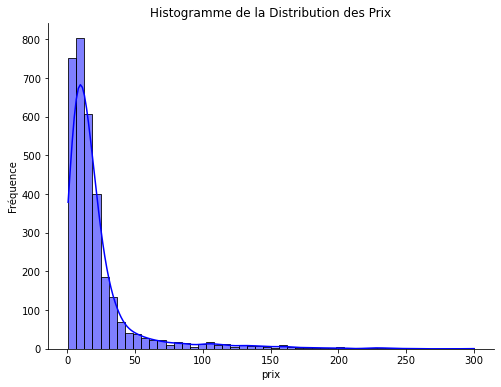

In [12]:
# Analyse exploratoire de la variable 'prix':
    
# 1. Calcul des mesures de statistiques descriptives pour vérifier si les données sont normalement distribuées ou asymétriques
    
mean = produit['prix'].mean()
std = produit['prix'].std()
median = produit['prix'].median()
mode = produit['prix'].mode()[0]
skewness = produit['prix'].skew()
kurtosis = produit['prix'].kurtosis()
    
print(color.BOLD+"Mesures statistiques de la variable 'prix':"+color.END)
print(f"Moyenne : {mean:.2f}")
print(f"Ecart-type : {std:.2f}")
print(f"Médiane : {median:.2f}")
print(f"Mode : {mode:.2f}")
print(f"Asymétrie : {skewness:.2f}")
print(f"Curtose : {kurtosis:.2f}")
    
# 2. Création d'un histogramme de la distribution des prix

plt.figure(figsize=(8,6))
sns.histplot(data=produit, x='prix', bins=50, kde=True, color='blue', alpha=0.5)
sns.despine()
plt.ylabel('Fréquence')
plt.title('Histogramme de la Distribution des Prix')
plt.show()


En résumé:
> - **Les Mesures Statistiques Descriptives et la Visualisation Graphique** démontrent que la **Distribution des Prix des Livres de la Librairie est Asymétrique à Droite**, avec une Médiane de **13.07€**, une Moyenne de **21.86€** et un Mode de **4.99€** (valeur la plus fréquente). 
> - La **forte Asymétrie et Curtose** de la Distribution signifie que la **Majorité des Prix de Livres sont inférieurs à la Moyenne**, mais que **quelques Livres ont des Prix très élevés**, ce qui étire la distribution vers les valeurs élevées.

> Pour **détecter les valeurs aberrantes**, nous utilisons la méthode IQR(inter quartile range), car plus robuste aux distributions asymétriques et aux valeurs aberrantes que la methode z-score, plus adaptée aux distributions normales.

> - **L'IQR** est une mesure de la dispersion des données qui est calculée comme la différence entre le troisième quartile (Q3) et le premier quartile (Q1). Les limites supérieures et inférieures sont définies comme Q3 + 1,5 * IQR et Q1 - 1,5 * IQR, respectivement. Toute valeur qui se situe en dehors de ces limites est considérée comme une valeur aberrante.

302 valeurs aberrantes ont été détectées selon la méthode IQR avec un seuil de 1.5. Soit 9.19 % des valeurs.

Liste des Livres avec des Valeurs aberrantes de la Méthode IQR:


,ref_produit,prix,categ
10,2_228,225.17,2
11,1_178,51.92,1
38,2_100,72.11,2
49,1_48,47.22,1
64,2_89,107.99,2
...,...,...,...
3267,2_101,63.99,2
3269,1_543,51.99,1
3271,2_123,147.99,2
3279,1_331,55.99,1


Graphique de données selon la  Méthode IQR
 


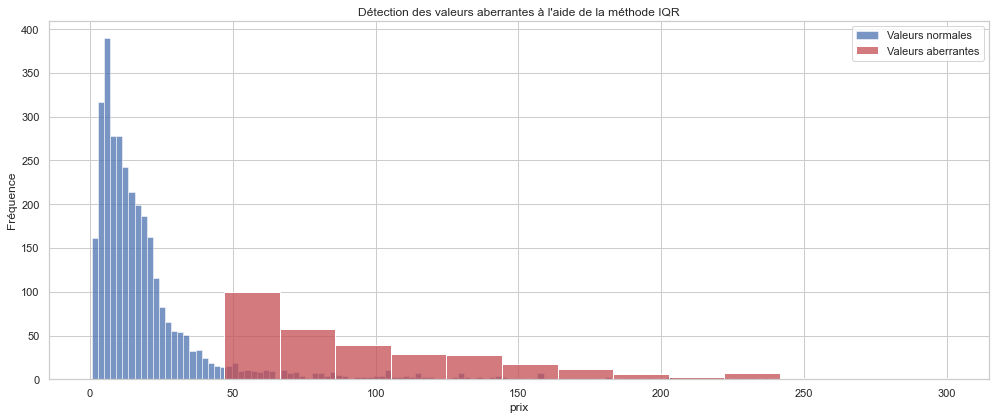

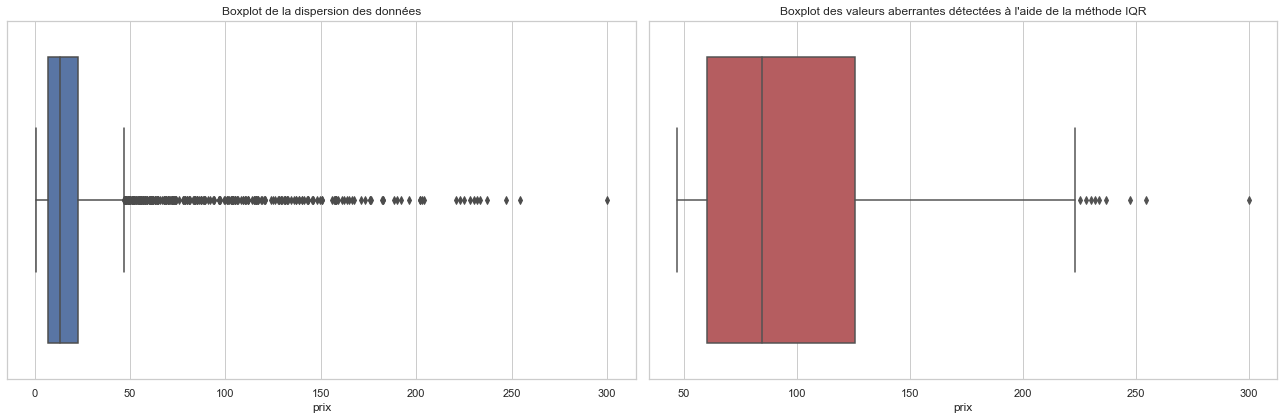

In [13]:
# Détection des Valeurs aberrantes de la variable 'prix' selon IQR 

# Détecter les valeurs aberrantes selon la méthode IQR
Q1 = produit['prix'].quantile(0.25)
Q3 = produit['prix'].quantile(0.75)
IQR = Q3 - Q1
seuil_iqr = 1.5
lim_inf = Q1 - seuil_iqr * IQR
lim_sup = Q3 + seuil_iqr * IQR
outliers_iqr = produit[(produit['prix'] < lim_inf) | (produit['prix'] > lim_sup)]
produit_sans_outliers = produit[((produit['prix'] > lim_inf) & (produit['prix'] < lim_sup))]

pourcent= (len(outliers_iqr) / len(produit)) * 100
# Afficher les valeurs aberrantes détectées
print(f"{len(outliers_iqr)} valeurs aberrantes ont été détectées selon la méthode IQR avec un seuil de {seuil_iqr}. Soit {pourcent:.2f} % des valeurs.")
print()
print('Liste des Livres avec des Valeurs aberrantes de la Méthode IQR:')
display(outliers_iqr)
    
# Résultat de la méthode IQR
    
print('Graphique de données selon la  Méthode IQR')

# Création de l'histogramme:
print()
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))
sns.histplot(data=produit, x='prix', color='b')
sns.histplot(data=outliers_iqr, x='prix', color='r', label='Outliers IQR')

# Ajout des légendes
plt.legend(labels=['Valeurs normales', 'Valeurs aberrantes'])
plt.ylabel('Fréquence')
plt.title('Détection des valeurs aberrantes à l\'aide de la méthode IQR')
plt.tight_layout()
plt.show()
    
# Création des boxplots pour chaque méthode:
print()
sns.set(style='whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(data=produit, x='prix', color='b', ax=ax1)
sns.boxplot(data=outliers_iqr, x='prix', color='r', ax=ax2)

# Ajout des légendes et des noms d'axes
ax1.set(title='Boxplot de la dispersion des données')
ax2.set(title='Boxplot des valeurs aberrantes détectées à l\'aide de la méthode IQR')
plt.tight_layout()
plt.show()


> On peut dire que la méthode de détection de valeurs aberrantes **IQR détecte plusieurs valeurs qui sont assez éloignées de la distribution principale des données**, ce qui suggère qu'il **peut y avoir des valeurs aberrantes dans le jeu de données**. Cependant, il est important **de déterminer si ces valeurs sont réellement des erreurs** ou **si elles sont nécessaires pour l'analyse.**

In [14]:
# Comparaison de statisques avec et sans outliers:

stats_avec_outliers = produit['prix'].describe()
stats_sans_outliers = produit_sans_outliers['prix'].describe()
print("Statistiques descriptives avec outliers :\n", stats_avec_outliers)
print('')
print("Statistiques descriptives sans outliers :\n", stats_sans_outliers)
print('')
pourcent_biais = (produit['prix'].mean() - produit_sans_outliers['prix'].mean()) / produit['prix'].mean() * 100
print('Pourcentage de biais:', f"{pourcent_biais:.2f}", '%')

Statistiques descriptives avec outliers :
 count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: prix, dtype: float64

Statistiques descriptives sans outliers :
 count    2984.000000
mean       14.109427
std         9.679829
min         0.620000
25%         6.570000
50%        11.990000
75%        19.290000
max        46.950000
Name: prix, dtype: float64

Pourcentage de biais: 35.47 %


>  En comparant les statistiques descriptives avec et sans outliers, on constate une différence significative dans la moyenne et la médiane:
> - **avec les outliers l'écart est important entre la Moyenne de 21.86 et la Médiane de 13.07**. Ce qui signifie que la **distribution des prix est biaisée** vers les valeurs **les plus élevées** à cause des valeurs aberrantes. 
> - **sans les outliers l'écart est réduit entre la Moyenne de 14,11 et la Médiane de 11.99**. Cela suggère une distribution moins biaisée et plus centrée autour de la Médiane.
> - **Le pourcentage de biais** montre que la présence de valeurs aberrantes entraine une augmentation de **35.47%** du prix moyen par rapport à la moyenne sans valeurs aberrantes. L'impact des outliers est donc important sur la tendance centrale des données. 

> Pour la suite des analyses, nous conserverons les valeurs aberrantes en supposant qu'elles sont bien réelles. Elles représentent **9,19%** de l'ensemble des données.


### <a id="A2.2">2.Table Client</a>

In [15]:
# Affichage des données de Clients

client = pd.read_csv('customers.csv')
client.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [16]:
# Vérification des dimensions du dataframe

client.shape

(8623, 3)

In [17]:
# Renommage des variables 

client.rename(columns = {'client_id': 'ref_client', 'sex': 'sexe', 'birth': 'annee_naiss'}, inplace = True)
client.head()

,ref_client,sexe,annee_naiss
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [18]:
# Expression du 'genre' en majuscule

client['sexe'] = client['sexe'].str.upper()
client['sexe'].head()

0    F
1    F
2    F
3    F
4    M
Name: sexe, dtype: object

In [19]:
# Ajouter l'âge des clients

client['age'] = datetime.now().year - client['annee_naiss']
client.head()

,ref_client,sexe,annee_naiss,age
0,c_4410,F,1967,56
1,c_7839,F,1975,48
2,c_1699,F,1984,39
3,c_5961,F,1962,61
4,c_5320,M,1943,80


In [20]:
# Créer une variable 'groupe_age' en regroupant les âges en tranches

bins = [18, 25, 35, 50, 65, 95]
labels = ['18-24', '25-34', '35-49', '50-64', '65-94']
client['groupe_age'] = pd.cut(client['age'], bins=bins, labels=labels, right=False)

client.head()

,ref_client,sexe,annee_naiss,age,groupe_age
0,c_4410,F,1967,56,50-64
1,c_7839,F,1975,48,35-49
2,c_1699,F,1984,39,35-49
3,c_5961,F,1962,61,50-64
4,c_5320,M,1943,80,65-94


In [21]:
# Vérification des Valeurs manquantes

client.isna().sum()

ref_client     0
sexe           0
annee_naiss    0
age            0
groupe_age     0
dtype: int64

In [22]:
# Vérification des doublons
# Test de la validité de la variable 'ref_client'  comme clé primaire

doublons_client = client.duplicated(subset = 'ref_client', keep=False).sum()

if doublons_client == 0:
    print('La variable', color.BOLD+ " 'ref_client' est une clé primaire valide." +color.END)
else:
    print('La variable', color.BOLD+ " 'ref_client' n'est pas une clé primaire valide." +color.END)

La variable  'ref_client' est une clé primaire valide.


In [23]:
# Vérification des erreurs de type

client.dtypes

ref_client       object
sexe             object
annee_naiss       int64
age               int64
groupe_age     category
dtype: object

In [24]:
# Vérification des valeurs aberrantes et atypiques

client.describe()

,annee_naiss,age
count,8623.000000,8623.000000
mean,1978.280877,44.719123
std,16.919535,16.919535
min,1929.000000,19.000000
25%,1966.000000,31.000000
50%,1979.000000,44.000000
75%,1992.000000,57.000000
max,2004.000000,94.000000


### <a id="A2.3">3.Table Transaction</a>

In [25]:
# Affichage des données de Transactions

transaction = pd.read_csv('transactions.csv')
transaction.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [26]:
# Vérification des dimensions du dataframe

transaction.shape

(679532, 4)

In [27]:
# Renommage de variables

transaction.rename(columns = {'id_prod': 'ref_produit','session_id': 'id_session', 'client_id': 'ref_client'}, inplace = True)
transaction.columns

Index(['ref_produit', 'date', 'id_session', 'ref_client'], dtype='object')

In [28]:
# Vérification des Valeurs manquantes

transaction.isna().sum()

ref_produit    0
date           0
id_session     0
ref_client     0
dtype: int64

In [29]:
# Vérification des doublons
# Pour vérifier l'unicité de la table il faut prendre en compte au minimum les 3 premières colonnes

doublons_transaction = transaction[['ref_produit', 'ref_client', 'date']].duplicated()
print('Nombre de doublons:', doublons_transaction.sum())

print('')
print('Liste des doublons:')
transaction[doublons_transaction]

Nombre de doublons: 126

Liste des doublons:


,ref_produit,date,id_session,ref_client
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


>Parmi les doublons, nous constatons qu'il y a beaucoup de dates qui sont précédés de 'test'. Vérifions le nombre total des lignes concernées par ces dates incorrectes. 

In [30]:
# Vérification des dates contenant 'test'

dates_test = transaction.loc[transaction['date'].str.contains('test_')]
print('La Table Transaction contient', color.BOLD+ f"{dates_test.shape[0]:,}", 'lignes avec des dates incorrectes.'+color.END, 'Il est nécessaire d\'avoir une explication sur ces données.')
print('')
print('Liste des dates incorrectes:')
dates_test

La Table Transaction contient 200 lignes avec des dates incorrectes. Il est nécessaire d'avoir une explication sur ces données.

Liste des dates incorrectes:


,ref_produit,date,id_session,ref_client
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [31]:
# vérification des valeurs uniques de chaque variable

print('Valeurs uniques dans ref_produit:')
display(dates_test['ref_produit'].unique())
print('Valeurs uniques dans date:')
display(dates_test['date'].unique())
print('Valeurs uniques dans id_session:')
display(dates_test['id_session'].unique())
print('Valeurs uniques dans ref_client:')
dates_test['ref_client'].unique()

Valeurs uniques dans ref_produit:


array(['T_0'], dtype=object)

Valeurs uniques dans date:


array(['test_2021-03-01 02:30:02.237419',
       'test_2021-03-01 02:30:02.237425',
       'test_2021-03-01 02:30:02.237437',
       'test_2021-03-01 02:30:02.237436',
       'test_2021-03-01 02:30:02.237430',
       'test_2021-03-01 02:30:02.237449',
       'test_2021-03-01 02:30:02.237444',
       'test_2021-03-01 02:30:02.237418',
       'test_2021-03-01 02:30:02.237445',
       'test_2021-03-01 02:30:02.237426',
       'test_2021-03-01 02:30:02.237434',
       'test_2021-03-01 02:30:02.237441',
       'test_2021-03-01 02:30:02.237440',
       'test_2021-03-01 02:30:02.237438',
       'test_2021-03-01 02:30:02.237427',
       'test_2021-03-01 02:30:02.237413',
       'test_2021-03-01 02:30:02.237412',
       'test_2021-03-01 02:30:02.237432',
       'test_2021-03-01 02:30:02.237420',
       'test_2021-03-01 02:30:02.237415',
       'test_2021-03-01 02:30:02.237443',
       'test_2021-03-01 02:30:02.237431',
       'test_2021-03-01 02:30:02.237446',
       'test_2021-03-01 02:30:02.2

Valeurs uniques dans id_session:


array(['s_0'], dtype=object)

Valeurs uniques dans ref_client:


array(['ct_0', 'ct_1'], dtype=object)

>**Après une vérification plus approfondie de ces 200 lignes,** nous constatons qu'elles correspondent à des **transactions** réalisées sur le **même produit 'T_0' à la même date**. **Il se peut que ces lignes résultent d'un test ou un beug.**
A cause de l'incertitude, nous les supprimons de nos analyses.

In [32]:
# Suppression des 200 lignes non conformes

transaction = transaction.drop(dates_test.index)
print('Nombre de lignes restant:', transaction.shape[0])

# Revérification des doublons

doublons_transaction = transaction[['ref_produit', 'ref_client', 'date']].duplicated()
print('Nombre de doublons:', doublons_transaction.sum())

Nombre de lignes restant: 679332
Nombre de doublons: 0


In [33]:
# Vérification des erreurs de type
transaction.dtypes

ref_produit    object
date           object
id_session     object
ref_client     object
dtype: object

In [34]:
# Conversion de la variable 'date' en format de date
transaction['date'] = pd.to_datetime(transaction['date'], format='%Y-%m-%d %H:%M:%S.%f')
print("Type de la variable date:", transaction['date'].dtypes)

# Ajout des variables 'jour', 'mois' et 'annee'
transaction['jour'] = transaction['date'].dt.day
transaction['mois'] = transaction['date'].dt.month
transaction['annee'] = transaction['date'].dt.year

transaction.head()

Type de la variable date: datetime64[ns]


,ref_produit,date,id_session,ref_client,jour,mois,annee
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,20,5,2022
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2,2,2022
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,18,6,2022
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,24,6,2021
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,11,1,2023


In [35]:
# Vérification de valeurs aberrantes et atypiques

transaction['date'].describe()

count                         679332
unique                        679332
top       2022-05-20 13:21:29.043970
freq                               1
first     2021-03-01 00:01:07.843138
last      2023-02-28 23:58:30.792755
Name: date, dtype: object

In [36]:
# Ajout de la varaible quantité pour exprimer le nombre de ventes avec pour valeur par défaut 1

transaction['quantite'] = 1
transaction = transaction[['ref_produit', 'date', 'jour', 'mois', 'annee', 'quantite', 'id_session', 'ref_client']]
transaction

,ref_produit,date,jour,mois,annee,quantite,id_session,ref_client
0,0_1518,2022-05-20 13:21:29.043970,20,5,2022,1,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,2,2,2022,1,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,18,6,2022,1,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,24,6,2021,1,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,11,1,2023,1,s_325227,c_4232
...,...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,15,1,2022,1,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,19,3,2022,1,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,20,12,2022,1,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,16,7,2021,1,s_63204,c_2227
